Pandas基础
1. 数据结构简介：DataFrame和Series
2. 数据索引index
3. 利用pandas查询数据
4. 利用pandas的DataFrames进行统计分析
5. 利用pandas实现SQL操作
6. 利用pandas进行缺失值的处理
7. 利用pandas实现Excel的数据透视表功能
8. 多层索引的使用

参考链接： https://www.cnblogs.com/nxld/p/6058591.html

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12282042.0.0.1dce2042zuzard&postId=6068

# 1. 数据结构简介

在pandas中有两类非常重要的数据结构，即序列Series和数据框DataFrame。Series类似于numpy中的一维数组，除了通吃一维数组可用的函数或方法，而且其可通过索引标签的方式获取数据，还具有索引的自动对齐功能；DataFrame类似于numpy中的二维数组，同样可以通用numpy数组的函数和方法，而且还具有其他灵活应用，后续会介绍到

## 1.1 Series的创建

序列的创建主要有三种方式

**1）通过一维数组创建序列**

In [1]:
import numpy as np, pandas as pd

arr1 = np.arange(10)
print(arr1)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
print(type(arr1))

<class 'numpy.ndarray'>


In [3]:
s1 = pd.Series(arr1)
print(s1)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64


In [4]:
print(type(s1))

<class 'pandas.core.series.Series'>


**2）通过字典的方式创建序列**

In [5]:
dic1 = {'a':10,'b':20,'c':30,'d':40,'e':50}
print(dic1)
print(type(dic1))

{'a': 10, 'b': 20, 'c': 30, 'd': 40, 'e': 50}
<class 'dict'>


**3）通过DataFrame中的某一行或某一列创建序列**

## 1.2 DataFrame的创建

数据框的创建主要有三种方式：

1）通过二维数组创建数据框

In [6]:
arr2 = np.array(np.arange(12)).reshape(4,3)
print(arr2)
print(type(arr2))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
<class 'numpy.ndarray'>


In [7]:
df1 = pd.DataFrame(arr2)
print(df1)
print(type(df1))

   0   1   2
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11
<class 'pandas.core.frame.DataFrame'>


**2）通过字典的方式创建数据框**

以下以两种字典来创建数据框，一个是字典列表，一个是嵌套字典。

In [8]:
dic2 = {'a':[1,2,3,4],'b':[5,6,7,8],'c':[9,10,11,12],'d':[13,14,15,16]}
print(dic2)
print(type(dic2))

{'a': [1, 2, 3, 4], 'b': [5, 6, 7, 8], 'c': [9, 10, 11, 12], 'd': [13, 14, 15, 16]}
<class 'dict'>


In [9]:
df2 = pd.DataFrame(dic2)
print(df2)
print(type(df2))

   a  b   c   d
0  1  5   9  13
1  2  6  10  14
2  3  7  11  15
3  4  8  12  16
<class 'pandas.core.frame.DataFrame'>


In [10]:
dic3 = {'one':{'a':1,'b':2,'c':3,'d':4},'two':{'a':5,'b':6,'c':7,'d':8},'three':{'a':9,'b':10,'c':11,'d':12}}
print(dic3)
print(type(dic3))

{'one': {'a': 1, 'b': 2, 'c': 3, 'd': 4}, 'two': {'a': 5, 'b': 6, 'c': 7, 'd': 8}, 'three': {'a': 9, 'b': 10, 'c': 11, 'd': 12}}
<class 'dict'>


In [11]:
df3 = pd.DataFrame(dic3)
print(df3)
print(type(df3))

   one  two  three
a    1    5      9
b    2    6     10
c    3    7     11
d    4    8     12
<class 'pandas.core.frame.DataFrame'>


**3）通过数据框的方式创建数据框**

In [12]:
df4 = df3[['one','three']]
print(df4)
print(type(df4))

   one  three
a    1      9
b    2     10
c    3     11
d    4     12
<class 'pandas.core.frame.DataFrame'>


In [13]:
s3 = df3['one']
print(s3)
print(type(s3))

a    1
b    2
c    3
d    4
Name: one, dtype: int64
<class 'pandas.core.series.Series'>


## 2. 数据索引index

细致的朋友可能会发现一个现象，不论是序列也好，还是数据框也好，对象的最左边总有一个非原始数据对象，这个是什么呢？不错，就是我们接下来要介绍的索引。 在我看来，序列或数据框的索引有两大用处，一个是通过索引值或索引标签获取目标数据，另一个是通过索引，可以使序列或数据框的计算、操作实现自动化对齐，下面我们就来看看这两个功能的应用。

### 2.1 通过索引值或索引标签获取数据

In [14]:
s4 = pd.Series(np.array([1,1,2,3,5,8]))
print(s4)

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64


如果不给序列一个指定的索引值，则序列自动生成一个从0开始的自增索引。可以通过index查看序列的索引：

In [15]:
print(s4.index)

RangeIndex(start=0, stop=6, step=1)


现在我们为序列设定一个自定义的索引值：



In [16]:
s4.index = ['a','b','c','d','e','f']
print(s4)

a    1
b    1
c    2
d    3
e    5
f    8
dtype: int64


序列有了索引，就可以通过索引值或索引标签进行数据的获取：



In [17]:
print('s4[3]: ',s4[3])
print('s4[e]: ',s4['e'])
print("s4[1,3,5]: ",s4[[1,3,5]])
print("s4[['a','b','d','f']]: ",s4[['a','b','d','f']])
print('s4[:4]: ',s4[:4])
print("s4['c':]: ",s4['c':])
print("s4['b':'e']: ",s4['b':'e'])

s4[3]:  3
s4[e]:  5
s4[1,3,5]:  b    1
d    3
f    8
dtype: int64
s4[['a','b','d','f']]:  a    1
b    1
d    3
f    8
dtype: int64
s4[:4]:  a    1
b    1
c    2
d    3
dtype: int64
s4['c':]:  c    2
d    3
e    5
f    8
dtype: int64
s4['b':'e']:  b    1
c    2
d    3
e    5
dtype: int64


> 千万注意：如果通过索引标签获取数据的话，末端标签所对应的值是可以返回的！在一维数组中，就无法通过索引标签获取数据，这也是序列不同于一维数组的一个方面。

## 2.2 自动化对齐

如果有两个序列，需要对这两个序列进行算术运算，这时索引的存在就体现的它的价值了—自动化对齐.



In [18]:
s5 = pd.Series(np.array([10,15,20,30,55,80]),index = ['a','b','c','d','e','f'])
print(s5)

s6 = pd.Series(np.array([12,11,13,15,14,16]),index = ['a','c','g','b','d','f'])
print(s6)
print(s5 + s6)
print(s5/s6)

a    10
b    15
c    20
d    30
e    55
f    80
dtype: int64
a    12
c    11
g    13
b    15
d    14
f    16
dtype: int64
a    22.0
b    30.0
c    31.0
d    44.0
e     NaN
f    96.0
g     NaN
dtype: float64
a    0.833333
b    1.000000
c    1.818182
d    2.142857
e         NaN
f    5.000000
g         NaN
dtype: float64


由于s5中没有对应的g索引，s6中没有对应的e索引，所以数据的运算会产生两个缺失值NaN。注意，这里的算术结果就实现了两个序列索引的自动对齐，而非简单的将两个序列加总或相除。对于数据框的对齐，不仅仅是行索引的自动对齐，同时也会自动对齐列索引（变量名）

数据框中同样有索引，而且数据框是二维数组的推广，所以其不仅有行索引，而且还存在列索引，关于数据框中的索引相比于序列的应用要强大的多，这部分内容将放在数据查询中讲解

# 3. 利用pandas查询数据

这里的查询数据相当于R语言里的subset功能，可以通过布尔索引有针对的选取原数据的子集、指定行、指定列等。我们先导入一个student数据集



In [19]:
stu_dic = {'Age':[14,13,13,14,14,12,12,15,13,12,11,14,12,15,16,12,15,11,15],
'Height':[69,56.5,65.3,62.8,63.5,57.3,59.8,62.5,62.5,59,51.3,64.3,56.3,66.5,72,64.8,67,57.5,66.5],
'Name':['Alfred','Alice','Barbara','Carol','Henry','James','Jane','Janet','Jeffrey','John','Joyce','Judy','Louise','Marry','Philip','Robert','Ronald','Thomas','Willam'],
'Sex':['M','F','F','F','M','M','F','F','M','M','F','F','F','F','M','M','M','M','M'],
'Weight':[112.5,84,98,102.5,102.5,83,84.5,112.5,84,99.5,50.5,90,77,112,150,128,133,85,112]}
student = pd.DataFrame(stu_dic)

查询数据的前5行或末尾5行

student.head()

student.tail()

In [20]:
print(student.head())

   Age  Height     Name Sex  Weight
0   14    69.0   Alfred   M   112.5
1   13    56.5    Alice   F    84.0
2   13    65.3  Barbara   F    98.0
3   14    62.8    Carol   F   102.5
4   14    63.5    Henry   M   102.5


In [21]:
print(student.tail())

    Age  Height    Name Sex  Weight
14   16    72.0  Philip   M   150.0
15   12    64.8  Robert   M   128.0
16   15    67.0  Ronald   M   133.0
17   11    57.5  Thomas   M    85.0
18   15    66.5  Willam   M   112.0


**查询指定的行**

student.loc[[0,2,4,5,7]] #这里的loc索引标签函数必须是中括号[]



In [22]:
print(student.iloc[[0,2,4,5,7]])

   Age  Height     Name Sex  Weight
0   14    69.0   Alfred   M   112.5
2   13    65.3  Barbara   F    98.0
4   14    63.5    Henry   M   102.5
5   12    57.3    James   M    83.0
7   15    62.5    Janet   F   112.5


查询指定的列

student[['Name','Height','Weight']].head() #如果多个列的话，必须使用双重中括号

In [23]:
print(student[['Name','Height','Weight']].head())

      Name  Height  Weight
0   Alfred    69.0   112.5
1    Alice    56.5    84.0
2  Barbara    65.3    98.0
3    Carol    62.8   102.5
4    Henry    63.5   102.5


**可以通过loc索引标签查询指定的列**

student.loc[:,['Name','Height','Weight']].head()

In [24]:
print(student.loc[:,['Name','Height','Weight']].head())

      Name  Height  Weight
0   Alfred    69.0   112.5
1    Alice    56.5    84.0
2  Barbara    65.3    98.0
3    Carol    62.8   102.5
4    Henry    63.5   102.5


**查询出所有12岁以上的女生信息**

student[(student['Sex']=='F') & (student['Age']>12)]

In [25]:
print(student[(student['Sex']=='F') & (student['Age']>12)])

    Age  Height     Name Sex  Weight
1    13    56.5    Alice   F    84.0
2    13    65.3  Barbara   F    98.0
3    14    62.8    Carol   F   102.5
7    15    62.5    Janet   F   112.5
11   14    64.3     Judy   F    90.0
13   15    66.5    Marry   F   112.0


上面的查询逻辑其实非常的简单，需要注意的是，如果是多个条件的查询，必须在&（且）或者|（或）的两端条件用括号括起来。



# 4. 利用pandas的DataFrames进行统计分析

pandas模块为我们提供了非常多的描述性统计分析的指标函数，如总和、均值、最小值、最大值等，我们来具体看看这些函数： 首先随机生成三组数据

In [26]:
np.random.seed(1234)
d1 = pd.Series(2*np.random.normal(size = 100)+3)
d2 = np.random.f(2,4,size = 100)
d3 = np.random.randint(1,100,size = 100)

print('非空元素计算: ', d1.count()) #非空元素计算
print('最小值: ', d1.min()) #最小值
print('最大值: ', d1.max()) #最大值
print('最小值的位置: ', d1.idxmin()) #最小值的位置，类似于R中的which.min函数
print('最大值的位置: ', d1.idxmax()) #最大值的位置，类似于R中的which.max函数
print('10%分位数: ', d1.quantile(0.1)) #10%分位数
print('求和: ', d1.sum()) #求和
print('均值: ', d1.mean()) #均值
print('中位数: ', d1.median()) #中位数
print('众数: ', d1.mode()) #众数
print('方差: ', d1.var()) #方差
print('标准差: ', d1.std()) #标准差
print('平均绝对偏差: ', d1.mad()) #平均绝对偏差
print('偏度: ', d1.skew()) #偏度
print('峰度: ', d1.kurt()) #峰度
print('描述性统计指标: ', d1.describe()) #一次性输出多个描述性统计指标

非空元素计算:  100
最小值:  -4.1270333212494705
最大值:  7.781921030926066
最小值的位置:  81
最大值的位置:  39
10%分位数:  0.6870184644069928
求和:  307.0224566250873
均值:  3.070224566250874
中位数:  3.204555266776845
众数:  0    -4.127033
1    -1.800907
2    -1.485370
3    -1.149955
4    -1.042510
5    -0.634054
6    -0.093811
7     0.108380
8     0.196053
9     0.618049
10    0.694682
11    0.714737
12    0.862022
13    0.944299
14    1.051527
15    1.147491
16    1.205686
17    1.429130
18    1.558823
19    1.688061
20    1.726953
21    1.830564
22    1.867108
23    1.903515
24    1.976237
25    2.061389
26    2.139809
27    2.200071
28    2.204320
29    2.310468
        ...   
70    4.131477
71    4.263959
72    4.351108
73    4.408456
74    4.409441
75    4.510828
76    4.534737
77    4.633188
78    4.682018
79    4.683349
80    4.719177
81    4.727435
82    4.774326
83    4.906648
84    4.969840
85    4.983892
86    5.067601
87    5.091877
88    5.095157
89    5.117938
90    5.300071
91    5.636303
92    5.642211


必须注意的是，descirbe方法只能针对序列或数据框，一维数组是没有这个方法的

这里自定义一个函数，将这些统计描述指标全部汇总到一起:

In [27]:
def stats(x):
	return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),x.quantile(.75),
                      x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                     index = ['Count','Min','Whicn_Min','Q1','Median','Q3','Mean','Max',
                              'Which_Max','Mad','Var','Std','Skew','Kurt'])
print(stats(d1))

Count        100.000000
Min           -4.127033
Whicn_Min     81.000000
Q1             2.040101
Median         3.204555
Q3             4.434788
Mean           3.070225
Max            7.781921
Which_Max     39.000000
Mad            1.511288
Var            4.005609
Std            2.001402
Skew          -0.649478
Kurt           1.220109
dtype: float64


在实际的工作中，我们可能需要处理的是一系列的数值型数据框，如何将这个函数应用到数据框中的每一列呢？可以使用apply函数，这个非常类似于R中的apply的应用方法。 将之前创建的d1,d2,d3数据构建数据框:

In [28]:
df = pd.DataFrame(np.array([d1,d2,d3]).T,columns=['x1','x2','x3'])
print(df.head())

         x1        x2    x3
0  3.942870  1.369531  55.0
1  0.618049  0.943264  68.0
2  5.865414  0.590663  73.0
3  2.374696  0.206548  59.0
4  1.558823  0.223204  60.0


In [29]:
print(df.apply(stats))

                   x1          x2          x3
Count      100.000000  100.000000  100.000000
Min         -4.127033    0.014330    3.000000
Whicn_Min   81.000000   72.000000   76.000000
Q1           2.040101    0.249580   25.000000
Median       3.204555    1.000613   54.500000
Q3           4.434788    2.101581   73.000000
Mean         3.070225    2.028608   51.490000
Max          7.781921   18.791565   98.000000
Which_Max   39.000000   53.000000   96.000000
Mad          1.511288    1.922669   24.010800
Var          4.005609   10.206447  780.090808
Std          2.001402    3.194753   27.930106
Skew        -0.649478    3.326246   -0.118917
Kurt         1.220109   12.636286   -1.211579


非常完美，就这样很简单的创建了数值型数据的统计性描述。如果是离散型数据呢？就不能用这个统计口径了，我们需要统计离散变量的观测数、唯一值个数、众数水平及个数。你只需要使用describe方法就可以实现这样的统计了

In [30]:
print(student['Sex'].describe())

count     19
unique     2
top        M
freq      10
Name: Sex, dtype: object


除以上的简单描述性统计之外，还提供了连续变量的相关系数（corr）和协方差矩阵（cov）的求解，这个跟R语言是一致的用法。

In [31]:
print(df.corr())

          x1        x2        x3
x1  1.000000  0.136085  0.037185
x2  0.136085  1.000000 -0.005688
x3  0.037185 -0.005688  1.000000


关于相关系数的计算可以调用pearson方法或kendell方法或spearman方法，默认使用pearson方法。



In [32]:
print(df.corr('spearman'))

         x1        x2        x3
x1  1.00000  0.178950  0.006590
x2  0.17895  1.000000 -0.033874
x3  0.00659 -0.033874  1.000000


In [33]:
# 如果只想关注某一个变量与其余变量的相关系数的话，可以使用corrwith,如下方只关心x1与其余变量的相关系数:
print(df.corrwith(df['x1']))
# 数值型变量间的协方差矩阵
print(df.cov())

x1    1.000000
x2    0.136085
x3    0.037185
dtype: float64
          x1         x2          x3
x1  4.005609   0.870124    2.078596
x2  0.870124  10.206447   -0.507512
x3  2.078596  -0.507512  780.090808


# 5. 利用pandas实现SQL操作

在SQL中常见的操作主要是增、删、改、查几个动作，那么pandas能否实现对数据的这几项操作呢？答案是Of Course!

**增：添加新行或增加新列**

In [34]:
dic = {'Name':['LiuShunxiang','Zhangshan'],'Sex':['M','F'],'Age':[27,23],'Height':[165.7,167.2],'Weight':[61,63]}
student2 = pd.DataFrame(dic)
print(student2)

           Name Sex  Age  Height  Weight
0  LiuShunxiang   M   27   165.7      61
1     Zhangshan   F   23   167.2      63


现在将student2中的数据新增到student中，可以通过concat函数实现：



In [35]:
student3 = pd.concat([student,student2])
print(student3)

    Age  Height          Name Sex  Weight
0    14    69.0        Alfred   M   112.5
1    13    56.5         Alice   F    84.0
2    13    65.3       Barbara   F    98.0
3    14    62.8         Carol   F   102.5
4    14    63.5         Henry   M   102.5
5    12    57.3         James   M    83.0
6    12    59.8          Jane   F    84.5
7    15    62.5         Janet   F   112.5
8    13    62.5       Jeffrey   M    84.0
9    12    59.0          John   M    99.5
10   11    51.3         Joyce   F    50.5
11   14    64.3          Judy   F    90.0
12   12    56.3        Louise   F    77.0
13   15    66.5         Marry   F   112.0
14   16    72.0        Philip   M   150.0
15   12    64.8        Robert   M   128.0
16   15    67.0        Ronald   M   133.0
17   11    57.5        Thomas   M    85.0
18   15    66.5        Willam   M   112.0
0    27   165.7  LiuShunxiang   M    61.0
1    23   167.2     Zhangshan   F    63.0


/home/louis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


注意到了吗？在数据库中union必须要求两张表的列顺序一致，而这里concat函数可以自动对齐两个数据框的变量！

新增列的话，其实在pandas中就更简单了，例如在student2中新增一列学生成绩：

In [36]:
print(pd.DataFrame(student2, columns=['Age','Height','Name','Sex','Weight','Score']))

   Age  Height          Name Sex  Weight  Score
0   27   165.7  LiuShunxiang   M      61    NaN
1   23   167.2     Zhangshan   F      63    NaN


对于新增的列没有赋值，就会出现空NaN的形式。

删：删除表、观测行或变量列
删除数据框student2,通过del命令实现，该命令可以删除Python的所有对象。

In [37]:
del student2 #删除数据框student2, 通过del命令可以删除python的所有对象
print(student2)

NameError: name 'student2' is not defined

In [38]:
print(student.drop([0,1,3,6]))

    Age  Height     Name Sex  Weight
2    13    65.3  Barbara   F    98.0
4    14    63.5    Henry   M   102.5
5    12    57.3    James   M    83.0
7    15    62.5    Janet   F   112.5
8    13    62.5  Jeffrey   M    84.0
9    12    59.0     John   M    99.5
10   11    51.3    Joyce   F    50.5
11   14    64.3     Judy   F    90.0
12   12    56.3   Louise   F    77.0
13   15    66.5    Marry   F   112.0
14   16    72.0   Philip   M   150.0
15   12    64.8   Robert   M   128.0
16   15    67.0   Ronald   M   133.0
17   11    57.5   Thomas   M    85.0
18   15    66.5   Willam   M   112.0


原数据中的第1,2,4,7行的数据已经被删除了。

根据布尔索引删除行数据，其实这个删除就是保留删除条件的反面数据，例如删除所有14岁以下的学生：



In [40]:
print(student[student['Age']>14])

    Age  Height    Name Sex  Weight
7    15    62.5   Janet   F   112.5
13   15    66.5   Marry   F   112.0
14   16    72.0  Philip   M   150.0
16   15    67.0  Ronald   M   133.0
18   15    66.5  Willam   M   112.0


In [41]:
print(student.drop(['Height','Weight'],axis=1).head())

   Age     Name Sex
0   14   Alfred   M
1   13    Alice   F
2   13  Barbara   F
3   14    Carol   F
4   14    Henry   M


我们发现，不论是删除行还是删除列，都可以通过drop方法实现，只需要设定好删除的轴即可，即调整drop方法中的axis参数。默认该参数为0，表示删除行观测，如果需要删除列变量，则需设置为1。

**改：修改原始记录的值**

如果发现表中的某些数据错误了，如何更改原来的值呢？我们试试结合布尔索引和赋值的方法： 例如发现student3中姓名为LiuShunxiang的学生身高错了，应该是173，如何改呢？

In [42]:
student3.loc[student3['Name'] == 'LiuShunxiang','Height']=173
print(student3[student3['Name'] == 'LiuShunxiang'][['Name','Height']])

           Name  Height
0  LiuShunxiang   173.0


这样就可以把原来的身高修改为现在的170了。 看，关于索引的操作非常灵活、方便吧，就这样轻松搞定数据的更改。

**查：有关数据查询部分，上面已经介绍过**

下面重点讲讲聚合、排序和多表连接操作。

**聚合：pandas模块中可以通过groupby()函数实现数据的聚合操作**

根据性别分组，计算各组别中学生身高和体重的平均值：

In [43]:
print(student.groupby('Sex').mean())

           Age     Height      Weight
Sex                                  
F    13.222222  60.588889   90.111111
M    13.400000  63.910000  108.950000


如果不对原始数据作限制的话，聚合函数会自动选择数值型数据进行聚合计算。如果不想对年龄计算平均值的话，就需要剔除改变量：

In [44]:
print(student.drop('Age',axis=1).groupby('Sex').mean())

        Height      Weight
Sex                       
F    60.588889   90.111111
M    63.910000  108.950000


groupby还可以使用多个分组变量，例如根本年龄和性别分组，计算身高与体重的平均值：



In [45]:
print(student.groupby(['Sex','Age']).mean())

            Height  Weight
Sex Age                   
F   11   51.300000   50.50
    12   58.050000   80.75
    13   60.900000   91.00
    14   63.550000   96.25
    15   64.500000  112.25
M   11   57.500000   85.00
    12   60.366667  103.50
    13   62.500000   84.00
    14   66.250000  107.50
    15   66.750000  122.50
    16   72.000000  150.00


当然，还可以对每个分组计算多个统计量：



In [47]:
print(student.drop('Age',axis=1).groupby('Sex').agg([np.mean,np.median]))

        Height             Weight        
          mean median        mean  median
Sex                                      
F    60.588889  62.50   90.111111   90.00
M    63.910000  64.15  108.950000  107.25


**排序：**

排序在日常的统计分析中还是比较常见的操作，我们可以使用sort_index和sort_values实现序列和数据框的排序工作

In [48]:
Data = pd.Series(np.array(np.random.randint(1,20,10)))
print(Data)
print(Data.sort_index())
print(Data.sort_values(ascending=False))


0    18
1    15
2    16
3    18
4    16
5     8
6    17
7    10
8    16
9     6
dtype: int64
0    18
1    15
2    16
3    18
4    16
5     8
6    17
7    10
8    16
9     6
dtype: int64
3    18
0    18
6    17
8    16
4    16
2    16
1    15
7    10
5     8
9     6
dtype: int64


在数据框中一般都是按值排序，
例如：

In [49]:
print(student.sort_values(by = ['Age','Height']))

    Age  Height     Name Sex  Weight
10   11    51.3    Joyce   F    50.5
17   11    57.5   Thomas   M    85.0
12   12    56.3   Louise   F    77.0
5    12    57.3    James   M    83.0
9    12    59.0     John   M    99.5
6    12    59.8     Jane   F    84.5
15   12    64.8   Robert   M   128.0
1    13    56.5    Alice   F    84.0
8    13    62.5  Jeffrey   M    84.0
2    13    65.3  Barbara   F    98.0
3    14    62.8    Carol   F   102.5
4    14    63.5    Henry   M   102.5
11   14    64.3     Judy   F    90.0
0    14    69.0   Alfred   M   112.5
7    15    62.5    Janet   F   112.5
13   15    66.5    Marry   F   112.0
18   15    66.5   Willam   M   112.0
16   15    67.0   Ronald   M   133.0
14   16    72.0   Philip   M   150.0


**多表连接:**

多表之间的连接也是非常常见的数据库操作，连接分内连接和外连接，在数据库语言中通过join关键字实现，pandas我比较建议使用merger函数实现数据的各种连接操作。 如下是构造一张学生的成绩表：

In [50]:
dic2 = {'Name':['Alfred','Alice','Barbara','Carol','Henry','Jeffrey','Judy','Philip','Robert','Willam'],
        'Score':[88,76,89,67,79,90,92,86,73,77]}
score = pd.DataFrame(dic2)

print(score)

      Name  Score
0   Alfred     88
1    Alice     76
2  Barbara     89
3    Carol     67
4    Henry     79
5  Jeffrey     90
6     Judy     92
7   Philip     86
8   Robert     73
9   Willam     77


现在想把学生表student与学生成绩表score做一个关联，该如何操作呢？

In [51]:
stu_score1 = pd.merge(student, score, on='Name')
print(stu_score1)

   Age  Height     Name Sex  Weight  Score
0   14    69.0   Alfred   M   112.5     88
1   13    56.5    Alice   F    84.0     76
2   13    65.3  Barbara   F    98.0     89
3   14    62.8    Carol   F   102.5     67
4   14    63.5    Henry   M   102.5     79
5   13    62.5  Jeffrey   M    84.0     90
6   14    64.3     Judy   F    90.0     92
7   16    72.0   Philip   M   150.0     86
8   12    64.8   Robert   M   128.0     73
9   15    66.5   Willam   M   112.0     77


注意，默认情况下，merge函数实现的是两个表之间的内连接，即返回两张表中共同部分的数据。可以通过how参数设置连接的方式，left为左连接；right为右连接；outer为外连接。

In [52]:
stu_score2 = pd.merge(student, score, on='Name', how='left')
print(stu_score2)

    Age  Height     Name Sex  Weight  Score
0    14    69.0   Alfred   M   112.5   88.0
1    13    56.5    Alice   F    84.0   76.0
2    13    65.3  Barbara   F    98.0   89.0
3    14    62.8    Carol   F   102.5   67.0
4    14    63.5    Henry   M   102.5   79.0
5    12    57.3    James   M    83.0    NaN
6    12    59.8     Jane   F    84.5    NaN
7    15    62.5    Janet   F   112.5    NaN
8    13    62.5  Jeffrey   M    84.0   90.0
9    12    59.0     John   M    99.5    NaN
10   11    51.3    Joyce   F    50.5    NaN
11   14    64.3     Judy   F    90.0   92.0
12   12    56.3   Louise   F    77.0    NaN
13   15    66.5    Marry   F   112.0    NaN
14   16    72.0   Philip   M   150.0   86.0
15   12    64.8   Robert   M   128.0   73.0
16   15    67.0   Ronald   M   133.0    NaN
17   11    57.5   Thomas   M    85.0    NaN
18   15    66.5   Willam   M   112.0   77.0


左连接实现的是保留student表中的所有信息，同时将score表的信息与之配对，能配多少配多少，对于没有配对上的Name，将会显示成绩为NaN。

## 6. 利用pandas进行缺失值的处理

现实生活中的数据是非常杂乱的，其中缺失值也是非常常见的，对于缺失值的存在可能会影响到后期的数据分析或挖掘工作，那么我们该如何处理这些缺失值呢？

常用的有三大类方法，即删除法、填补法和插值法。

- 删除法：当数据中的某个变量大部分值都是缺失值，可以考虑删除改变量；当缺失值是随机分布的，且缺失的数量并不是很多是，也可以删除这些缺失的观测。
- 替补法：对于连续型变量，如果变量的分布近似或就是正态分布的话，可以用均值替代那些缺失值；如果变量是有偏的，可以使用中位数来代替那些缺失值；对于离散型变量，我们一般用众数去替换那些存在缺失的观测。
- 插补法：插补法是基于蒙特卡洛模拟法，结合线性模型、广义线性模型、决策树等方法计算出来的预测值替换缺失值。

我们这里就介绍简单的删除法和替补法：

In [54]:
s = stu_score2['Score']
print(s)

0     88.0
1     76.0
2     89.0
3     67.0
4     79.0
5      NaN
6      NaN
7      NaN
8     90.0
9      NaN
10     NaN
11    92.0
12     NaN
13     NaN
14    86.0
15    73.0
16     NaN
17     NaN
18    77.0
Name: Score, dtype: float64


这是一组含有缺失值的序列，我们可以结合sum函数和isnull函数来检测数据中含有多少缺失值：



In [55]:
print(sum(pd.isnull(s)))

9


直接删除缺失值

In [56]:
print(s.dropna())

0     88.0
1     76.0
2     89.0
3     67.0
4     79.0
8     90.0
11    92.0
14    86.0
15    73.0
18    77.0
Name: Score, dtype: float64


默认情况下，dropna会删除任何含有缺失值的行，我们再构造一个数据框试试：



In [57]:
df = pd.DataFrame([[1,1,2],[3,5,np.nan],[13,21,34],[55,np.nan,10],[np.nan,np.nan,np.nan],[np.nan,1,2]],columns=('x1','x2','x3'))
print(df)
print(df.dropna())


     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0   NaN
2  13.0  21.0  34.0
3  55.0   NaN  10.0
4   NaN   NaN   NaN
5   NaN   1.0   2.0
     x1    x2    x3
0   1.0   1.0   2.0
2  13.0  21.0  34.0


返回结果表明，数据中只要含有缺失值NaN,该数据行就会被删除，如果使用参数how=’all’，则表明只删除所有行为缺失值的观测;

使用一个常量来填补缺失值，可以使用fillna函数实现简单的填补工作：

**用0填补所有缺失值**

In [58]:
print(df.fillna(0))

     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0   0.0
2  13.0  21.0  34.0
3  55.0   0.0  10.0
4   0.0   0.0   0.0
5   0.0   1.0   2.0


**2)采用前项填充或后向填充**

In [59]:
print(df.fillna(method='ffill'))
print(df.fillna(method='bfill'))

     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0   2.0
2  13.0  21.0  34.0
3  55.0  21.0  10.0
4  55.0  21.0  10.0
5  55.0   1.0   2.0
     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0  34.0
2  13.0  21.0  34.0
3  55.0   1.0  10.0
4   NaN   1.0   2.0
5   NaN   1.0   2.0


**3)使用常量填充不同的列**

In [60]:
print(df.fillna({'x1':1,'x2':2,'x3':3}))

     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0   3.0
2  13.0  21.0  34.0
3  55.0   2.0  10.0
4   1.0   2.0   3.0
5   1.0   1.0   2.0


In [61]:
x1_median=df['x1'].median()
x2_mean=df['x2'].mean()
x3_mean=df['x3'].mean()

print(x1_median)
print(x2_mean)
print(x3_mean)
print(df.fillna({'x1':x1_median,'x2':x2_mean,'x3':x3_mean}))

8.0
7.0
12.0
     x1    x2    x3
0   1.0   1.0   2.0
1   3.0   5.0  12.0
2  13.0  21.0  34.0
3  55.0   7.0  10.0
4   8.0   7.0  12.0
5   8.0   1.0   2.0


很显然，在使用填充法时，相对于常数填充或前项、后项填充，使用各列的众数、均值或中位数填充要更加合理一点，这也是工作中常用的一个快捷手段

## 7. 利用pandas实现Excel的数据透视表功能

在Excel中有一个非常强大的功能就是数据透视表，通过托拉拽的方式可以迅速的查看数据的聚合情况，这里的聚合可以是计数、求和、均值、标准差等。 pandas为我们提供了非常强大的函数pivot_table()，该函数就是实现数据透视表功能的。对于上面所说的一些聚合函数，可以通过参数aggfunc设定。我们先看看这个函数的语法和参数吧：

```
pivot_table(data,values=None,
            index=None,
            columns=None,
            aggfunc='mean',
            fill_value=None,
            margins=False,
            dropna=True,
            margins_name='All')  
```

data：需要进行数据透视表操作的数据框
values：指定需要聚合的字段
index：指定某些原始变量作为行索引
columns：指定哪些离散的分组变量
aggfunc：指定相应的聚合函数
fill_value：使用一个常数替代缺失值，默认不替换
margins：是否进行行或列的汇总，默认不汇总
dropna：默认所有观测为缺失的列
margins_name：默认行汇总或列汇总的名称为'All'

我们仍然以student表为例，来认识一下数据透视表pivot_table函数的用法： 对一个分组变量（Sex），一个数值变量（Height）作统计汇总

In [62]:
Table1 = pd.pivot_table(student, values=['Height'], columns=['Sex'])
print(Table1)

Sex             F      M
Height  60.588889  63.91


对一个分组变量（Sex），两个数值变量（Height,Weight）作统计汇总

In [63]:
Table2 = pd.pivot_table(student, values=['Height','Weight'], columns=['Sex'])
print(Table2)

Sex             F       M
Height  60.588889   63.91
Weight  90.111111  108.95


对两个分组变量（Sex，Age)，两个数值变量（Height,Weight）作统计汇总

In [64]:
Table3 = pd.pivot_table(student, values=['Height','Weight'], columns=['Sex','Age'])
print(Table3)

        Sex  Age
Height  F    11      51.300000
             12      58.050000
             13      60.900000
             14      63.550000
             15      64.500000
        M    11      57.500000
             12      60.366667
             13      62.500000
             14      66.250000
             15      66.750000
             16      72.000000
Weight  F    11      50.500000
             12      80.750000
             13      91.000000
             14      96.250000
             15     112.250000
        M    11      85.000000
             12     103.500000
             13      84.000000
             14     107.500000
             15     122.500000
             16     150.000000
dtype: float64


很显然这样的结果并不像Excel中预期的那样，该如何变成列联表的形式的？很简单，只需将结果进行非堆叠操作（unstack）即可：

In [65]:
Table4 = pd.pivot_table(student, values=['Height','Weight'], columns=['Sex','Age']).unstack()
print(Table4)

Age           11          12    13      14      15     16
       Sex                                               
Height F    51.3   58.050000  60.9   63.55   64.50    NaN
       M    57.5   60.366667  62.5   66.25   66.75   72.0
Weight F    50.5   80.750000  91.0   96.25  112.25    NaN
       M    85.0  103.500000  84.0  107.50  122.50  150.0


** 使用多个聚合函数 **

In [66]:
Table5 = pd.pivot_table(student, values=['Height','Weight'], columns=['Sex'],aggfunc=[np.mean,np.median,np.std])
print(Table5)

             mean         median                std           
Sex             F       M      F       M          F          M
Height  60.588889   63.91   62.5   64.15   5.018328   4.937937
Weight  90.111111  108.95   90.0  107.25  19.383914  22.727186


有关更多数据透视表的操作，可参考《Pandas透视表（pivot_table）详解》一文，链接地址：http://python.jobbole.com/81212/



## 8. 多层索引的使用

最后我们再来讲讲pandas中的一个重要功能，那就是多层索引。在序列中它可以实现在一个轴上拥有多个索引，就类似于Excel中常见的这种形式：

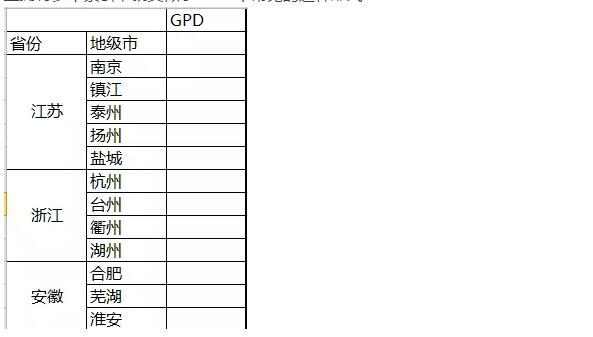

对于这样的数据格式有什么好处呢？pandas可以帮我们实现用低维度形式处理高维数数据，这里举个例子也许你就能明白了：

In [67]:
# Series的层次化索引，索引是一个二维数组，相当于两个索引决定一个值
# 有点类似于DataFrame的行索引和列索引
s = pd.Series(np.arange(1,10),index=[["a","a","a","b","b","c","c","d","d"],[1,2,3,1,2,3,1,2,3]])
print(s)

a  1    1
   2    2
   3    3
b  1    4
   2    5
c  3    6
   1    7
d  2    8
   3    9
dtype: int64


In [68]:
print(s.index)

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 2]])


In [69]:
#选取外层索引为a的数据
print(s['a'])
#选取外层索引为a和内层索引为1的数据
print(s['a',1])
#选取外层索引为a和内层索引为1,3的数据
print(s['a'][[1,3]])
#层次化索引的切片，包括右端的索引
print(s[['a','c']])
print(s['b':'d'])
#通过unstack方法可以将Series变成一个DataFrame
#数据的类型以及数据的输出结构都变成了DataFrame，对于不存在的位置使用NaN填充
print(s.unstack())

1    1
2    2
3    3
dtype: int64
1
1    1
3    3
dtype: int64
a  1    1
   2    2
   3    3
c  3    6
   1    7
dtype: int64
b  1    4
   2    5
c  3    6
   1    7
d  2    8
   3    9
dtype: int64
     1    2    3
a  1.0  2.0  3.0
b  4.0  5.0  NaN
c  7.0  NaN  6.0
d  NaN  8.0  9.0


**DataFrame的层次化索引**



In [70]:
data = pd.DataFrame(np.random.randint(0,150,size=(8,12)),
               columns = pd.MultiIndex.from_product([['模拟考','正式考'],
                                                   ['数学','语文','英语','物理','化学','生物']]),
               index = pd.MultiIndex.from_product([['期中','期末'],
                                                   ['雷军','李斌'],
                                                  ['测试一','测试二']]))
data

模拟考                          正式考                         
            数学  语文   英语   物理   化学   生物   数学   语文   英语   物理   化学   生物
期中 雷军 测试一  138  57   24    3   77    0  131  116  149    0   66  136
      测试二   53  47   48  123   61   57   32  139   62   22    7   59
   李斌 测试一    6  58   42   98   65   31  115  109   24   83    3  101
      测试二  121  69  100   47   46   11   85   41    5   37   12  144
期末 雷军 测试一  126  18  127   15   79  131    1   73   72  104   48   56
      测试二   44  79   86   86  129  116   51    5   85  148  137  138
   李斌 测试一   67  30    8  125  115   48  134  120   51  115   98   59
      测试二   75  16  123  115   76    9   64  148   77  126   49   94

In [71]:
data['模拟考'][['语文','数学']]

语文   数学
期中 雷军 测试一  57  138
      测试二  47   53
   李斌 测试一  58    6
      测试二  69  121
期末 雷军 测试一  18  126
      测试二  79   44
   李斌 测试一  30   67
      测试二  16   75

In [72]:
print(data.loc['期中','雷军','测试一']['模拟考','数学'])

138


In [73]:
print(data.iloc[0])

模拟考  数学    138
     语文     57
     英语     24
     物理      3
     化学     77
     生物      0
正式考  数学    131
     语文    116
     英语    149
     物理      0
     化学     66
     生物    136
Name: (期中, 雷军, 测试一), dtype: int64


In [74]:
data['正式考']

数学   语文   英语   物理   化学   生物
期中 雷军 测试一  131  116  149    0   66  136
      测试二   32  139   62   22    7   59
   李斌 测试一  115  109   24   83    3  101
      测试二   85   41    5   37   12  144
期末 雷军 测试一    1   73   72  104   48   56
      测试二   51    5   85  148  137  138
   李斌 测试一  134  120   51  115   98   59
      测试二   64  148   77  126   49   94

讲到这里，我们关于pandas模块的学习基本完成，其实在掌握了pandas这8个主要的应用方法就可以灵活的解决很多工作中的数据处理、统计分析等任务。有关更多的pandas介绍，可参考pandas官方文档：htt